In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("Drive mounted succesfully")

Mounted at /content/drive
Drive mounted succesfully


In [5]:
import os
from collections import Counter

def count_images_in_folders(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

dataset_path = "/content/drive/MyDrive/MajorProject/KneeXray-images"  # Change path accordingly
class_distribution = count_images_in_folders(dataset_path)

print("Class Distribution:", class_distribution)


Class Distribution: {'0Normal': 3253, '2Mild': 2185, '3Moderate': 1086, '4Severe': 1000}


In [ ]:
import os
import random
from PIL import Image
from torchvision import transforms

# Severe class folder (KL-4)
severe_class_path ="/content/drive/MyDrive/MajorProject/KneeXray-images/4Severe"

# Define augmentation (without RGB conversion)
severe_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1))
])

# Create an output folder for augmented images
augmented_path = "/content/drive/MyDrive/MajorProject/KneeXray-images/4Severe-augmented"
os.makedirs(augmented_path, exist_ok=True)

# Apply augmentation and save new images
num_augmented = 1000  # Number of augmented images to generate
severe_images = os.listdir(severe_class_path)

for i in range(num_augmented):
    img_name = random.choice(severe_images)
    img_path = os.path.join(severe_class_path, img_name)

    # Open Image (Grayscale)
    img = Image.open(img_path).convert("L")

    # Apply augmentation
    augmented_img = severe_transform(img)

    # Save augmented image
    save_path = os.path.join(augmented_path, f"aug_{i}.jpg")
    augmented_img.save(save_path)

print("✅ Augmentation completed for Severe class (KL-4)!")


✅ Augmentation completed for Severe class (KL-4)!


In [ ]:
# Define input (grayscale) and output (RGB) directories
dataset_path = "/content/drive/MyDrive/MajorProject/KneeXray-images"
output_path = "/content/drive/MyDrive/MajorProject/RGB_images"
os.makedirs(output_path, exist_ok=True)

# Convert all images to RGB
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    output_class_path = os.path.join(output_path, class_name)
    os.makedirs(output_class_path, exist_ok=True)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path).convert("RGB")  # Convert to RGB
        img.save(os.path.join(output_class_path, img_name))

print(" All images converted to RGB successfully!")


 All images converted to RGB successfully!


In [ ]:
import os
from sklearn.model_selection import train_test_split
import shutil

# Paths
rgb_dataset_path = "/content/drive/MyDrive/MajorProject/RGB_images"
train_path = "/content/drive/MyDrive/MajorProject/train_test_val/train"
val_path = "/content/drive/MyDrive/MajorProject/train_test_val/val"
test_path = "/content/drive/MyDrive/MajorProject/train_test_val/test"  # Fixed missing '/'

# Create directories
for path in [train_path, val_path, test_path]:
    os.makedirs(path, exist_ok=True)

# Debugging: Check if dataset path exists
if not os.path.exists(rgb_dataset_path):
    print(" Dataset path does not exist!")
else:
    print(" Dataset path found.")

# Split dataset
for class_name in os.listdir(rgb_dataset_path):
    class_path = os.path.join(rgb_dataset_path, class_name)

    # Ensure it's a directory (skip any non-folder files)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    print(f"Class: {class_name}, Total Images: {len(images)}")  # Debugging step

    # If no images are found, continue
    if len(images) == 0:
        print(f" No images found in {class_name}, skipping...")
        continue

    # Split into Train (70%), Val (15%), Test (15%)
    train_imgs, temp_imgs = train_test_split(images, test_size=0.3, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    # Copy images to respective folders
    for img_set, folder in zip([train_imgs, val_imgs, test_imgs], [train_path, val_path, test_path]):
        output_class_path = os.path.join(folder, class_name)
        os.makedirs(output_class_path, exist_ok=True)

        for img_name in img_set:
            src = os.path.join(class_path, img_name)
            dest = os.path.join(output_class_path, img_name)

            if os.path.exists(src):  # Ensure the image exists before copying
                shutil.copy(src, dest)

print("Dataset successfully split into Train, Validation, and Test sets!")


 Dataset path found.
Class: 0Normal, Total Images: 3253
Class: 2Mild, Total Images: 2185
Class: 3Moderate, Total Images: 1086
Class: 4Severe, Total Images: 1000
Dataset successfully split into Train, Validation, and Test sets!


In [ ]:
import os

# Define checkpoint directory path
checkpoint_dir = "/content/drive/MyDrive/MajorProject/checkpoints"

# Create directory if it doesn't exist
os.makedirs(checkpoint_dir, exist_ok=True)

print(f" Checkpoint folder created at: {checkpoint_dir}")


 Checkpoint folder created at: /content/drive/MyDrive/MajorProject/checkpoints


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations (Resize & Normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])


# Load datasets
train_dataset = datasets.ImageFolder(root="/content/drive/MyDrive/MajorProject/train_test_val/train", transform=transform)
val_dataset = datasets.ImageFolder(root="/content/drive/MyDrive/MajorProject/train_test_val/val", transform=transform)
test_dataset = datasets.ImageFolder(root="/content/drive/MyDrive/MajorProject/train_test_val/test", transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(" Data Loaded Successfully!")


 Data Loaded Successfully!


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load Pretrained DenseNet-121
model = models.densenet121(pretrained=True)

# Modify the classifier for 4 classes
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 4)  # 4 classes (KL grades)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(" Model Loaded and Modified!")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


 Model Loaded and Modified!


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # Multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)

print(" Loss Function & Optimizer Set!")


 Loss Function & Optimizer Set!


In [ ]:
import torch

# Define checkpoint path
checkpoint_path = os.path.join(checkpoint_dir, "best_model.pth")
start_epoch = 0
best_val_loss = float("inf")

# Load checkpoint if exists
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint["model_state"])
    optimizer.load_state_dict(checkpoint["optimizer_state"])
    start_epoch = checkpoint["epoch"] + 1  # Resume from next epoch
    best_val_loss = checkpoint["val_loss"]
    print(f" Loaded checkpoint from epoch {start_epoch}")

else:
    print(" No checkpoint found, starting training from scratch.")


 No checkpoint found, starting training from scratch.


In [ ]:
# Training Loop with Checkpoint Every 5 Epochs
num_epochs = 50  # Set the total number of epochs

for epoch in range(start_epoch, num_epochs):
    model.train()
    train_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)

    # **Validation Step**
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Compute accuracy
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(val_loader)
    val_acc = correct / total * 100

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

    # **Save Checkpoint Every 5 Epochs**
    if (epoch + 1) % 5 == 0:
        checkpoint_path = f"{checkpoint_dir}/model_epoch_{epoch+1}.pth"
        checkpoint = {
            "epoch": epoch,
            "model_state": model.state_dict(),
            "optimizer_state": optimizer.state_dict(),
            "val_loss": val_loss,
        }
        torch.save(checkpoint, checkpoint_path)
        print(f"Checkpoint saved at epoch {epoch+1}")

print(" Training Completed!")


Epoch [1/50] - Train Loss: 0.2219 | Val Loss: 0.3925 | Val Acc: 82.99%
Epoch [2/50] - Train Loss: 0.1316 | Val Loss: 0.5570 | Val Acc: 79.19%
Epoch [3/50] - Train Loss: 0.0930 | Val Loss: 0.5351 | Val Acc: 82.99%
Epoch [4/50] - Train Loss: 0.0688 | Val Loss: 0.5242 | Val Acc: 83.79%
Epoch [5/50] - Train Loss: 0.0434 | Val Loss: 0.6422 | Val Acc: 82.02%
Checkpoint saved at epoch 5
Epoch [6/50] - Train Loss: 0.0488 | Val Loss: 0.5859 | Val Acc: 82.29%
Epoch [7/50] - Train Loss: 0.0656 | Val Loss: 0.6236 | Val Acc: 82.91%
Epoch [8/50] - Train Loss: 0.0415 | Val Loss: 0.5797 | Val Acc: 82.29%
Epoch [9/50] - Train Loss: 0.0368 | Val Loss: 0.6664 | Val Acc: 81.67%
Epoch [10/50] - Train Loss: 0.0419 | Val Loss: 0.5904 | Val Acc: 83.35%
Checkpoint saved at epoch 10
Epoch [11/50] - Train Loss: 0.0317 | Val Loss: 0.5552 | Val Acc: 84.23%
Epoch [12/50] - Train Loss: 0.0161 | Val Loss: 0.6511 | Val Acc: 85.03%
Epoch [13/50] - Train Loss: 0.0144 | Val Loss: 0.7426 | Val Acc: 83.35%
Epoch [14/50] - 

✅ Test Accuracy: 85.65%

🔹 Classification Report:
               precision    recall  f1-score   support

        KL-0       0.89      0.90      0.89       488
        KL-2       0.76      0.76      0.76       328
        KL-3       0.83      0.80      0.82       163
        KL-4       1.00      1.00      1.00       150

    accuracy                           0.86      1129
   macro avg       0.87      0.86      0.87      1129
weighted avg       0.86      0.86      0.86      1129



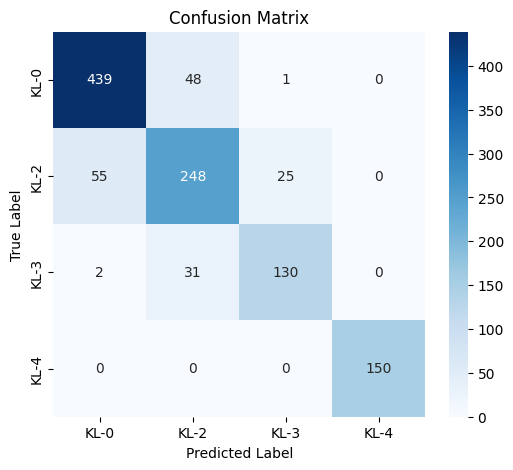

In [ ]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Set model to evaluation mode
model.eval()

all_preds = []
all_labels = []

# Run inference on test set
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Compute accuracy
test_accuracy = accuracy_score(all_labels, all_preds) * 100
print(f"✅ Test Accuracy: {test_accuracy:.2f}%")

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Print classification report
class_names = ['KL-0', 'KL-2', 'KL-3', 'KL-4']  # Update based on your dataset classes
report = classification_report(all_labels, all_preds, target_names=class_names)
print("\n🔹 Classification Report:\n", report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import torch

# Define the path to save the model
model_save_path = "/content/drive/MyDrive/MajorProject/final_model.pth"

# Save the model's state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"✅ Model saved successfully at: {model_save_path}")


✅ Model saved successfully at: /content/drive/MyDrive/MajorProject/final_model.pth


In [ ]:
!pip install torchcam  # Install TorchCAM for easy Grad-CAM visualization


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling